### Question 4


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.utils.random import sample_without_replacement
from scipy.spatial import distance

In [2]:
data_set_path_1 = "../data/uscap_name.txt"
data_set_path_2 = "../data/uscap_xy.txt"
data1 = pd.read_csv(data_set_path_1, sep=",", header=None)
data1.columns = ["City", "State"]
data2 = pd.read_csv(data_set_path_2, sep = "\s+", header=None)
data2.columns = ["X-Coordinate", "Y-Coordinate"]
data2
frames = [data1,data2]
data = pd.concat(frames, sort = 'False', axis = 1)
data = data.drop(data.index[1])
data = data.drop(data.index[9])
data = data.reset_index(drop=True)
data

b, c = data.iloc[0], data.iloc[3]


temp = data.iloc[0].copy()
data.iloc[0] = c
data.iloc[3] = temp
data  #this swap makes sacramento first location

,City,State,X-Coordinate,Y-Coordinate
0,Sacramento,California,-8392.976246,2664.025176
1,Phoenix,Arizona,-7743.816805,2311.143387
2,Little Rock,Arkansas,-6379.680295,2400.107649
3,Montgomery,Alabama,-5961.513053,2236.041996
4,Denver,Colorado,-7253.950857,2745.804159
5,Hartford,Connecticut,-5021.665662,2885.918649
6,Dover,Delaware,-5218.571379,2705.918983
7,Tallahassee,Florida,-5822.883103,2104.087378
8,Atlanta,Georgia,-5830.983188,2332.669658
9,Boise,Idaho,-8031.517820,3013.520309


In [3]:
# initial path 

coordinates = data.iloc[:,[2,3]].values
num_cities = 48

# end of random coordinate generation
# --------------------------------------------------

# distance matrix: euclidean dist between every point
dist_mat = pairwise_distances(coordinates, coordinates, metric='euclidean')

#coordinates

Initial path length: 59050.047779598455


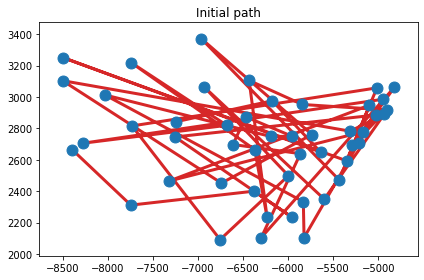

In [4]:
# Parameters
p_len = 0
iterations = 20000 # number of iterations
c = 1
# a = 0.5
p = np.arange(0,num_cities) # Initial path p
for a1 in range(0,num_cities-1):
    p_len = p_len + distance.euclidean(coordinates[a1],coordinates[a1+1])
print('Initial path length:',str(p_len))

# Save the paths and lengths
pathHistory = np.zeros((iterations,num_cities))
lenHistory = []
thresh_ar = []

# plot cities and initial path
plt.figure()
x_coord = coordinates[:,0]
y_coord = coordinates[:,1]
plt.plot(x_coord, y_coord, 'C3', zorder=1, lw=3)
plt.scatter(x_coord, y_coord, s=120, zorder=2)
plt.title('Initial path')
plt.tight_layout()
plt.show()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power


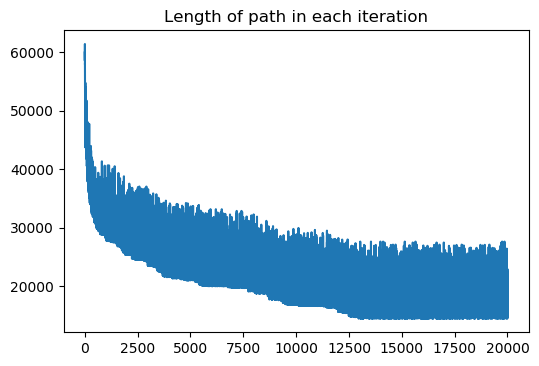

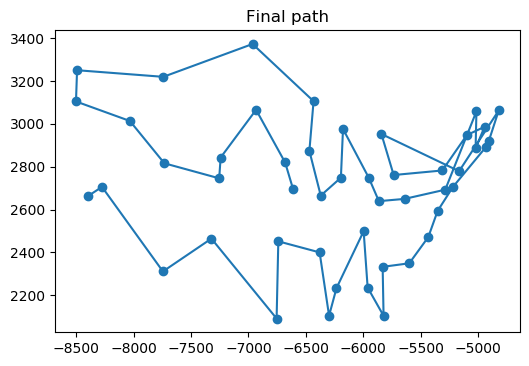

In [5]:
iter_count = 0;
p2 = []
while iter_count < iterations:
    iter_count = iter_count + 1;
    # Create path p2 by randomly swap two cities
    # index of two cities for the new path
    swap_i, swap_j = np.random.choice(num_cities, 2)
    p2 = np.copy(p)
    # swap the two cities of the path
    p2[swap_i], p2[swap_j] = p2[swap_j], p2[swap_i]

    # new path length
    p_len2 = 0
    
    for a1 in range(0,num_cities-1):
        p_len2 = p_len2 + distance.euclidean(coordinates[p2[a1]],coordinates[p2[a1+1]])
    
    thresh = np.power((1+iter_count),((p_len - p_len2)/c))
#     altearnative formula for q
#     thresh = np.exp((p_len - p_len2)/(c*np.power(a,iter_count)))

    # change paths if new path is shorter than previous
    if p_len2 - p_len <= 0:
#         p[:] = p2[:]
        p = np.copy(p2)
        p_len = np.copy(p_len2)

    #  or change paths with probability thres 
    else:
        if np.random.rand() <= thresh:
            p = np.copy(p2)
            p_len = np.copy(p_len2)

    # bookeeping
    pathHistory[iter_count-1][0:len(p2)] = p2
    lenHistory.append(p_len2)
    thresh_ar.append(thresh)

plt.figure(num=None,dpi=100)
plt.plot(lenHistory)
plt.title('Length of path in each iteration')
plt.show()

ind_f = pathHistory[-1,:].astype(int)
x_coord_f = coordinates[ind_f,0]
y_coord_f = coordinates[ind_f,1]
plt.figure(num=None,dpi=100)
plt.title('Final path')
plt.plot(x_coord_f, y_coord_f, '-o')
plt.show()
#print(np.shape(lenHistory))

In [6]:
cities_order = []
for i in range(0,len(x_coord_f)):
    cities_order.append(data.loc[data['X-Coordinate'] == x_coord_f[i] , 'City'].iloc[0])
print(cities_order)

['Sacramento', 'Carson City', 'Phoenix', 'Santa Fe', 'Austin', 'Oklahoma City', 'Little Rock', 'Baton Rouge', 'Jackson', 'Nashville', 'Montgomery', 'Tallahassee', 'Atlanta', 'Columbia', 'Raleigh', 'Richmond', 'Dover', 'Providence', 'Boston', 'Augusta', 'Trenton', 'Lansing', 'Columbus', 'Harrisburg', 'Albany', 'Concord', 'Hartford', 'Montpelier', 'Annapolis', 'Charleston', 'Frankfort', 'Indianapolis', 'Madison', 'Springfield', 'Jefferson City', 'Des Moines', 'Saint Paul', 'Bismarck', 'Helena', 'Olympia', 'Salem', 'Boise', 'Salt Lake City', 'Denver', 'Cheyenne', 'Pierre', 'Lincoln', 'Topeka']


### Question 4 Analysis

- The array list above marks the optimal path calculated when starting from Sacramento. 
- The graph above it lists all the coordinates and the direction of the path taken from Sacramento to its endpoint in Topeka, Kansas.
- Look at the graph that indicates the length of the path at each iteration, at around 15000 iterations the length of the path begins to flatten and converge to the optimal answer. The simulation shown here is at 20000 iterations. 
- The randomized initial path length begins at value of around 60000, and through the iterations begins to drop until it hovers at around 30000.  